In [16]:
import pandas as pd
#import glob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [17]:
data = pd.read_csv("C:/Users/HP/Downloads/dataset.csv/dataset.csv")

In [18]:
data

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False
...,...,...
199995,Conor maynard seamlessly fits old-school r&b h...,False
199996,How to you make holy water? you boil the hell ...,True
199997,How many optometrists does it take to screw in...,True
199998,Mcdonald's will officially kick off all-day br...,False


In [43]:
raw_data = data.copy()

In [45]:
raw_data['humor'] = raw_data['humor'].map({False: 0, True: 1})

In [46]:
raw_data

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",0
1,Watch: darvish gave hitter whiplash with slow ...,0
2,What do you call a turtle without its shell? d...,1
3,5 reasons the 2016 election feels so personal,0
4,"Pasco police shot mexican migrant from behind,...",0
...,...,...
199995,Conor maynard seamlessly fits old-school r&b h...,0
199996,How to you make holy water? you boil the hell ...,1
199997,How many optometrists does it take to screw in...,1
199998,Mcdonald's will officially kick off all-day br...,0


# Defining the inputs and the target. Creating the train-test split.

In [47]:
# Define the inputs and the target
inputs = data['text']
target = data['humor']

In [48]:
# Create a training and a testing dataset.
x_train, x_test, y_train, y_test = train_test_split(inputs, target, 
                                                    test_size=0.2, 
                                                    random_state=365, 
                                                    stratify = target)

In [49]:
#Now we check he portion of the classes in each split
y_train.value_counts()

0    80000
1    80000
Name: humor, dtype: int64

In [50]:
y_test.value_counts()

0    20000
1    20000
Name: humor, dtype: int64

# Tokenizing the text

In [ ]:
vectorizer = CountVectorizer()

Now, we create a vocabulary dictionary containing the words from the training dataset

In [51]:
x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)

In [54]:
x_test_transf.shape

(40000, 55640)

In [59]:
x_train_transf.shape

(160000, 55640)

# Performing the classifier

In [60]:
clf = MultinomialNB(class_prior = np.array([0.6,0.4]))

In [61]:
clf.fit(x_train_transf, y_train)

MultinomialNB(class_prior=array([0.6, 0.4]))

In [62]:
clf.get_params()

{'alpha': 1.0, 'class_prior': array([0.6, 0.4]), 'fit_prior': True}

# Performing the evaluation of the test dataset

In [63]:
y_test_pred = clf.predict(x_test_transf)

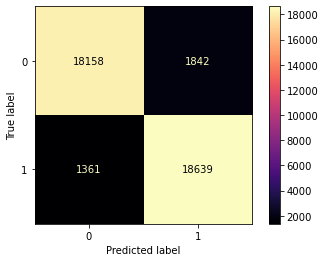

In [64]:
# Create the confusion matrix by providing the true and the predicted values as arguments.
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

Metrics that can be very useful for quantifying the performance of a classifier

In [65]:
#The goal is to check if a text is funny or not in the data
print(classification_report(y_test, y_test_pred, target_names = ['Not funny', 'Funny']))

              precision    recall  f1-score   support

   Not funny       0.93      0.91      0.92     20000
       Funny       0.91      0.93      0.92     20000

    accuracy                           0.92     40000
   macro avg       0.92      0.92      0.92     40000
weighted avg       0.92      0.92      0.92     40000



PRECISION -- From the table shows the number of correctly identified funny text over all samples classified as funny

RECALL -- Gives an idea of how many funny comments the model has caught and how many it has missed.

F1 SCORE --- Defined as the harmonice mean of precision and recall

# Making Predictions

In [74]:
# Choose the messages whose class you want to predict and put them in a list.
# Using the vectorizer, transform the messages and store the result in a variable called 'predict_data'.
predict_data = vectorizer.transform(['Joe biden rules out 2020 bid: guys, im not running',
                                     'Donald trump has found something mysterious for rudy giuliani to do'])

In [75]:
# Call the 'predict()' method and use 'predict_data' as an argument.
# The classifier correctly predicts the two messages.
clf.predict(predict_data)

array([0, 0], dtype=int64)